<a href="https://colab.research.google.com/github/airoud/ML-Prediction-Models/blob/main/TESLA_Inc_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Description : This progra uses and artificail recurent neural network called LSTM to predict 
# the closing stock price of a corporation ( Apple inc) using the past 60 day stock price

In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import   Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [11]:
 # Get the s tock quote
 df = web.DataReader('TSLA',data_source='yahoo',start='2013-01-01',end='2020-11-30')
 # Show the data
 df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,7.090000,6.942000,7.000000,7.072000,5974000.0,7.072000
2013-01-03,7.090000,6.950000,7.036000,6.954000,3710000.0,6.954000
2013-01-04,6.960000,6.784000,6.960000,6.880000,3370000.0,6.880000
2013-01-07,6.960000,6.780000,6.960000,6.868000,2210000.0,6.868000
2013-01-08,6.900000,6.622000,6.900000,6.736000,6420000.0,6.736000
...,...,...,...,...,...,...
2020-11-23,526.000000,501.790009,503.500000,521.849976,50260300.0,521.849976
2020-11-24,559.989990,526.200012,540.400024,555.380005,53648500.0,555.380005
2020-11-25,574.000000,545.369995,550.059998,574.000000,48930200.0,574.000000


In [12]:
# Get the number of rows and columns in the data set
df.shape

(1993, 6)

Text(0, 0.5, 'Close Price USD  ($)')

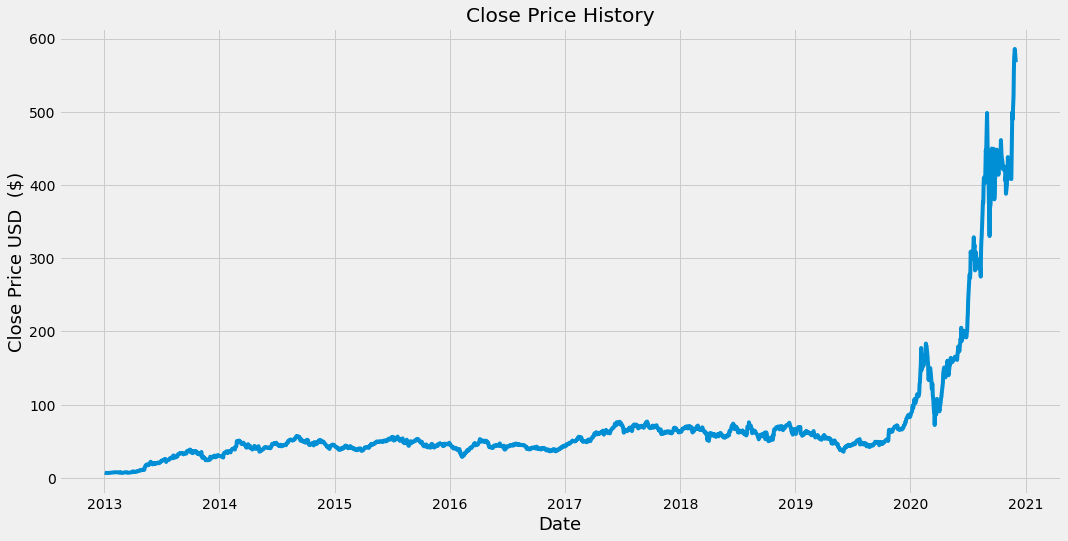

In [13]:
# Visualize te closing price history

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD  ($)',fontsize=18 )
  

In [20]:
# Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset=data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

1595

In [22]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)    

scaled_data

array([[8.46027024e-04],
       [6.42289954e-04],
       [5.14522876e-04],
       ...,
       [9.79695345e-01],
       [1.00000000e+00],
       [9.68645159e-01]])

In [25]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len ,:]
# Split the data into x_train and y_train data sets
x_train = [] 
y_train = []

for i in range(60,len(train_data)):   
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<= 61: 
    print(x_train)
    print(y_train)
    print()

[array([0.00084603, 0.00064229, 0.00051452, 0.0004938 , 0.00026589,
       0.00025208, 0.0002141 , 0.        , 0.00012086, 0.00034186,
       0.00041093, 0.00050762, 0.00055596, 0.00078732, 0.00106703,
       0.00140889, 0.00140544, 0.00176802, 0.0017404 , 0.00159191,
       0.00158846, 0.00186126, 0.00166788, 0.00180255, 0.00216168,
       0.00226873, 0.00218586, 0.0019027 , 0.00171968, 0.00191306,
       0.0018509 , 0.00142616, 0.00219967, 0.00194414, 0.00077696,
       0.00110501, 0.00050762, 0.00052488, 0.00075624, 0.00066301,
       0.00060085, 0.000922  , 0.00129149, 0.00165062, 0.00183709,
       0.00191996, 0.00213751, 0.00214442, 0.00209607, 0.00136055,
       0.00082185, 0.00077351, 0.00074934, 0.00104976, 0.00107048,
       0.00128113, 0.00159536, 0.00170932, 0.00181291, 0.00171968])]
[0.003805393911748131]

[array([0.00084603, 0.00064229, 0.00051452, 0.0004938 , 0.00026589,
       0.00025208, 0.0002141 , 0.        , 0.00012086, 0.00034186,
       0.00041093, 0.00050762, 0.0

In [28]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train= np.array(x_train),np.array(y_train)


In [30]:
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0], x_ train.shape[1], 1)) 
x_train.shape

(1535, 60, 1)

In [32]:
#Build the LSTM model
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
 

In [36]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [37]:
#Train the model 
model.fit(x_train,y_train, batch_size=1,epochs=1)

1535/1535 [==============================] - 36s 22ms/step - loss: 1.4409e-04


In [38]:
#Creating the testing data set
# Creating a new array containing scaled values from index 1535 to 1993
test_data = scaled_data[training_data_len-60:,:]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [39]:
#Convert the data to a numpy array to use it in the LSTM Model
x_test = np.array(x_test)


In [41]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [42]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [43]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse



5.391170472954985

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


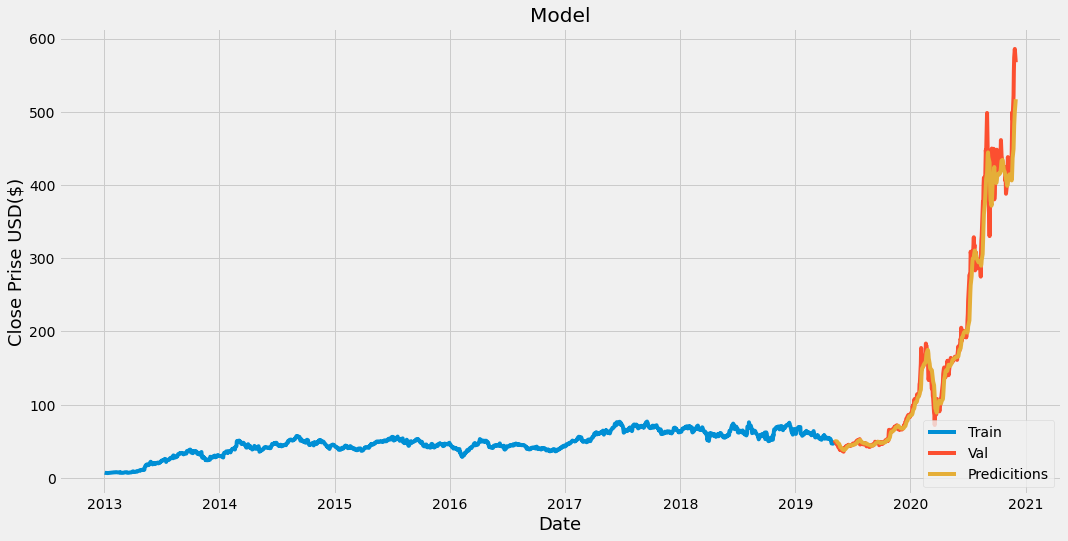

In [47]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Prise USD($)' ,fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predicitions'],loc='lower right')
plt.show()

In [48]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-05-06,51.068001,49.145153
2019-05-07,49.411999,49.651798
2019-05-08,48.967999,49.979603
2019-05-09,48.396000,50.106209
2019-05-10,47.903999,50.028229
...,...,...
2020-11-23,521.849976,449.267090
2020-11-24,555.380005,463.901520
2020-11-25,574.000000,481.563141
